# projet 1 ML

##  Santé du sommeil et mode de vie


objectif :
* Exploration et pretraitement de données  sur la Santé du Sommeil et le Mode de Vie

*  prédire la durée du sommeil

* classifier les troubles du sommeil

* identifier des clusters ou des schémas inhabituels dans les données

* remarque

In [ ]:
import pandas as pd
import numpy as np


data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/fichier csv - excel/sleep_health_lifestyle_dataset.csv')
data.head()

,Person ID,Gender,Age,Occupation,Sleep Duration (hours),Quality of Sleep (scale: 1-10),Physical Activity Level (minutes/day),Stress Level (scale: 1-10),BMI Category,Blood Pressure (systolic/diastolic),Heart Rate (bpm),Daily Steps,Sleep Disorder
0,1,Male,29,Manual Labor,7.4,7.0,41,7,Obese,124/70,91,8539,NaN
1,2,Female,43,Retired,4.2,4.9,41,5,Obese,131/86,81,18754,NaN
2,3,Male,44,Retired,6.1,6.0,107,4,Underweight,122/70,81,2857,NaN
3,4,Male,29,Office Worker,8.3,10.0,20,10,Obese,124/72,55,6886,NaN
4,5,Male,67,Retired,9.1,9.5,19,4,Overweight,133/78,97,14945,Insomnia


## Section 1 : Exploration et prétraitement des données


* Examiner la structure des données

In [ ]:
data.describe()

,Person ID,Age,Sleep Duration (hours),Quality of Sleep (scale: 1-10),Physical Activity Level (minutes/day),Stress Level (scale: 1-10),Heart Rate (bpm),Daily Steps
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.00000,400.000000,400.000000
mean,200.500000,39.950000,8.041250,6.125750,64.985000,5.47250,75.990000,11076.510000
std,115.614301,14.038883,2.390787,1.975733,32.297874,2.80873,15.099334,5364.789364
min,1.000000,18.000000,4.100000,1.000000,10.000000,1.00000,50.000000,2067.000000
25%,100.750000,29.000000,5.900000,4.700000,35.000000,3.00000,63.000000,6165.250000
50%,200.500000,40.000000,8.200000,6.100000,65.500000,5.00000,77.000000,11785.500000
75%,300.250000,49.000000,10.125000,7.425000,94.000000,8.00000,90.000000,15878.000000
max,400.000000,90.000000,12.000000,10.000000,120.000000,10.00000,100.000000,19958.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 13 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Person ID                              400 non-null    int64  
 1   Gender                                 400 non-null    object 
 2   Age                                    400 non-null    int64  
 3   Occupation                             400 non-null    object 
 4   Sleep Duration (hours)                 400 non-null    float64
 5   Quality of Sleep (scale: 1-10)         400 non-null    float64
 6   Physical Activity Level (minutes/day)  400 non-null    int64  
 7   Stress Level (scale: 1-10)             400 non-null    int64  
 8   BMI Category                           400 non-null    object 
 9   Blood Pressure (systolic/diastolic)    400 non-null    object 
 10  Heart Rate (bpm)                       400 non-null    int64  
 11  Daily 

In [ ]:
missingvalues = data.isna().sum()
print(missingvalues)

Person ID                                  0
Gender                                     0
Age                                        0
Occupation                                 0
Sleep Duration (hours)                     0
Quality of Sleep (scale: 1-10)             0
Physical Activity Level (minutes/day)      0
Stress Level (scale: 1-10)                 0
BMI Category                               0
Blood Pressure (systolic/diastolic)        0
Heart Rate (bpm)                           0
Daily Steps                                0
Sleep Disorder                           290
dtype: int64


we note an absence between thoses features

* Encoding Categorical Data in Sklearn

In [ ]:
categorical_col = data.select_dtypes(include = ['object']).columns
numerical_col = data.select_dtypes(include = ['float64','int64']).columns
categorical_col

Index(['Gender', 'Occupation', 'BMI Category',
       'Blood Pressure (systolic/diastolic)', 'Sleep Disorder'],
      dtype='object')

In [ ]:
for i in categorical_col :
  print(f'valeur prise par la variable {i} : ')
  print(data[i].unique())
  print('---'*20)


valeur prise par la variable Gender : 
['Male' 'Female']
------------------------------------------------------------
valeur prise par la variable Occupation : 
['Manual Labor' 'Retired' 'Office Worker' 'Student']
------------------------------------------------------------
valeur prise par la variable BMI Category : 
['Obese' 'Underweight' 'Overweight' 'Normal']
------------------------------------------------------------
valeur prise par la variable Blood Pressure (systolic/diastolic) : 
['124/70' '131/86' '122/70' '124/72' '133/78' '123/60' '121/70' '134/87'
 '112/63' '125/84' '138/92' '113/66' '137/90' '123/73' '126/81' '134/79'
 '128/78' '114/65' '113/65' '113/63' '129/75' '122/77' '132/86' '126/78'
 '120/77' '130/85' '118/71' '140/86' '124/73' '111/60' '123/74' '118/67'
 '135/86' '123/72' '129/82' '113/76' '119/70' '126/69' '136/82' '131/77'
 '110/60' '121/71' '122/72' '123/77' '121/73' '120/67' '122/73' '124/77'
 '138/88' '137/84' '109/67' '112/74' '123/76' '123/80' '133/86' '14

In [ ]:
from sklearn.preprocessing import LabelEncoder , OrdinalEncoder , OneHotEncoder

#Gender : 0 for Female and 1 Female
OHE = OneHotEncoder(categories=[['Female','Male']],sparse_output=False)
data['Gender'] = OHE.fit_transform(data[['Gender']])

#Occupation :
LE = LabelEncoder()
data['Occupation'] = LE.fit_transform(data['Occupation'])

#BMI Category :
LE = OrdinalEncoder(categories=[['Underweight' ,'Normal' ,'Overweight','Obese' ]])
data['BMI Category'] = LE.fit_transform(data[['BMI Category']])

#Blood Pressure (systolic/diastolic) :
data['systolic'] = data['Blood Pressure (systolic/diastolic)'].str[:3].astype(float)
data['diastolic'] = data['Blood Pressure (systolic/diastolic)'].str[4:].astype(float)

data=data.drop(columns=["Blood Pressure (systolic/diastolic)"])

#Sleep Disorder :
# data['Sleep Disorder'] = data['Sleep Disorder'].fillna('not Know')
# OHE_ = OneHotEncoder(categories=[['not Know','Insomnia','Sleep Apnea']],sparse_output=False)
# data['Sleep Disorder'] = OHE_.fit_transform(data[['Sleep Disorder']])

data['Sleep Disorder'] = data['Sleep Disorder'].fillna(data['Sleep Disorder'].mode().iloc[0])
LE = LabelEncoder()
data['Sleep Disorder'] = LE.fit_transform(data['Sleep Disorder'])

#soit ca soit supprimer la colonne j hesite

In [ ]:
data.head()

,Person ID,Gender,Age,Occupation,Sleep Duration (hours),Quality of Sleep (scale: 1-10),Physical Activity Level (minutes/day),Stress Level (scale: 1-10),BMI Category,Heart Rate (bpm),Daily Steps,Sleep Disorder,systolic,diastolic
0,1,0.0,29,0,7.4,7.0,41,7,3.0,91,8539,0,124.0,70.0
1,2,1.0,43,2,4.2,4.9,41,5,3.0,81,18754,0,131.0,86.0
2,3,0.0,44,2,6.1,6.0,107,4,0.0,81,2857,0,122.0,70.0
3,4,0.0,29,1,8.3,10.0,20,10,3.0,55,6886,0,124.0,72.0
4,5,0.0,67,2,9.1,9.5,19,4,2.0,97,14945,0,133.0,78.0


In [ ]:
i= 'Sleep Disorder'
print(f'valeur prise par la variable {i} : ')
print(data[i].unique())
print('---'*20)


valeur prise par la variable Sleep Disorder : 
[0 1]
------------------------------------------------------------


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 14 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Person ID                              400 non-null    int64  
 1   Gender                                 400 non-null    float64
 2   Age                                    400 non-null    int64  
 3   Occupation                             400 non-null    int64  
 4   Sleep Duration (hours)                 400 non-null    float64
 5   Quality of Sleep (scale: 1-10)         400 non-null    float64
 6   Physical Activity Level (minutes/day)  400 non-null    int64  
 7   Stress Level (scale: 1-10)             400 non-null    int64  
 8   BMI Category                           400 non-null    float64
 9   Heart Rate (bpm)                       400 non-null    int64  
 10  Daily Steps                            400 non-null    int64  
 11  Sleep 

* Visualiser les distributions des principales variables (durée du sommeil, niveaux d'activité physique,
stress, catégories d'IMC) et identifier les relations entre les variables

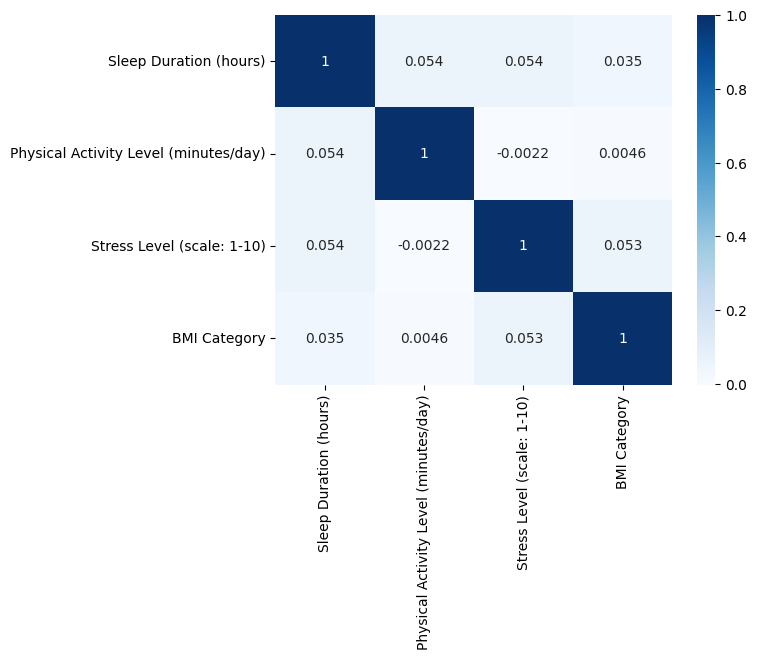

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

data_corr = data[['Sleep Duration (hours)','Physical Activity Level (minutes/day)','Stress Level (scale: 1-10)','BMI Category']]
corr_matrix = data_corr.corr()

sns.heatmap(corr_matrix,cmap="Blues",annot=True)

plt.show()

WE see a little  confusion relation between features

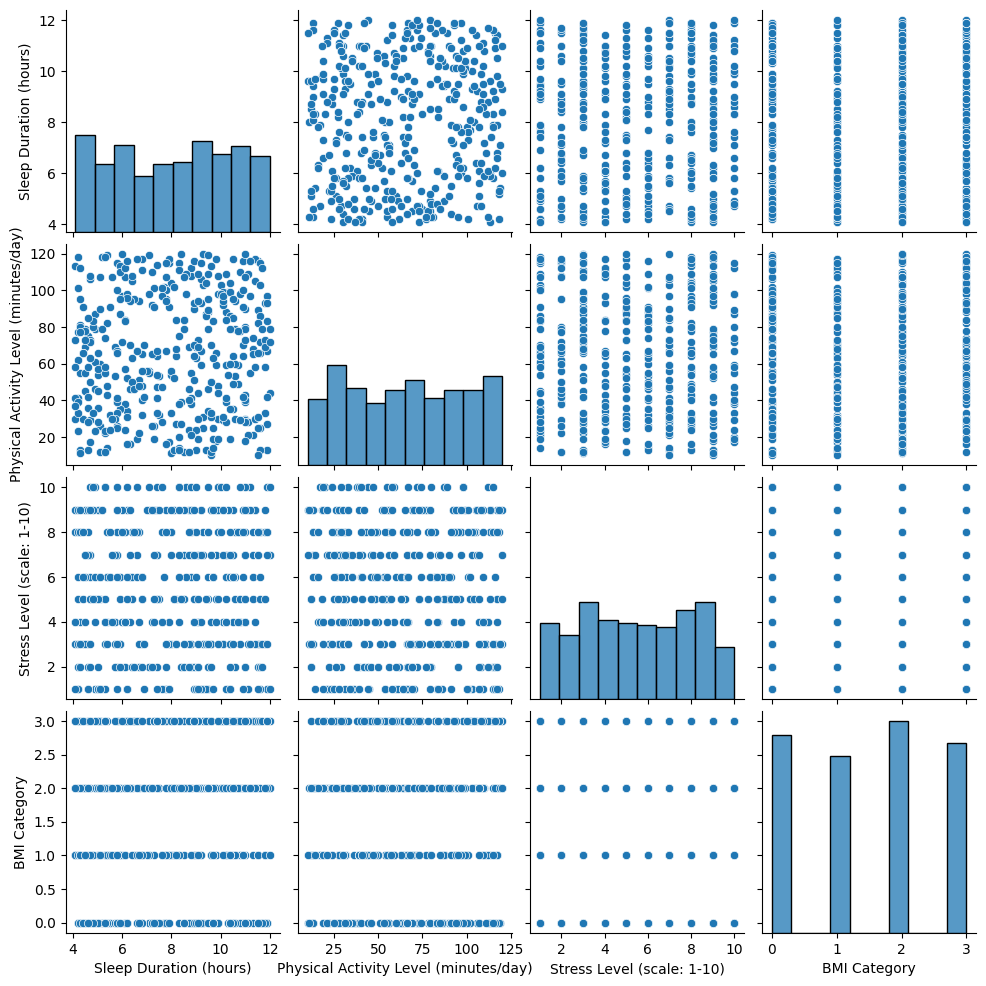

In [ ]:
sns.pairplot(data_corr)
plt.savefig("output_file.png")


* Between "Sleep Duration (hours)" and "Physical Activity Level (minutes/day)" : on remarque une repartition asser aleatoire . on conclu une absence de correlation


* Between "Sleep Duration (hours)" and "Stress Level (scale: 1-10)" :
pour chaque valeur de stresse level on remarque une quantité approximativement égale  de sleep duration . on remarque egalement que pour chaque stesse level il existe des intervalle de  sleep duration tres frequent mais ces intervalle varie selon la duré de stress il exoste donc un influence du  stresse sur la durée du sommeil

* Between "Sleep Duration (hours)" and "BMI Category": pour chaque BIM categoriy elle correston a presque toute les valeur de sleep duration avec forte concentration  ce qui relfete un abesence de correlation distingable entre ces 2


* Between "Physical Activity Level (minutes/day)" and  "Stress Level (scale: 1-10)" : pour chaque valeur de stresse level on remarque une quantité approximativement égale  de physical activitiy . on remarque egalement que pour chaque stesse level il existe des intervalle de  physical activitiy tres frequent mais ces intervalle varie selon la duré de stress il existe donc un influence du  stresse sur le physical activitiy



* Between "Physical Activity Level (minutes/day)" and "BMI Category":  pour chaque BIM categoriy elle correston a presque toute les valeur de physical activitiy avec forte concentration  ce qui relfete un abesence de correlation distingable entre ces 2



* Between " "Stress Level (scale: 1-10)"" and "'BMI Category'" : on remarque que pour chaque BIM on obtient les meme valeur de stresse level on doit chercher a connaitre la distriution de stresse level pour chaque valeur de BIM .  mais il est est trer problable que la distibution soit presque la meme ce que montrerait une forte corelation entre ces 2 features ce qui n est pas bien pour notre objectif





In [ ]:
# chercher  la distriution de stresse level pour chaque valeur de BIM
# BIM = np.array(data['BMI Category'])
# stress = np.array(data["Stress Level (scale: 1-10)"])
# ?

we see an abscene or relation between principals variables

## Section 2 :  Régression Linéaire - Prédire la durée du sommeil à partir des facteurs liés au mode de vie.


* Diviser les données en ensembles d'entraînement et de test

In [ ]:
print(data.columns)

Index(['Person ID', 'Gender', 'Age', 'Occupation', 'Sleep Duration (hours)',
       'Quality of Sleep (scale: 1-10)',
       'Physical Activity Level (minutes/day)', 'Stress Level (scale: 1-10)',
       'BMI Category', 'Heart Rate (bpm)', 'Daily Steps', 'Sleep Disorder',
       'systolic', 'diastolic'],
      dtype='object')


In [ ]:
# 'Quality of Sleep (scale: 1-10)', 'Stress Level (scale: 1-10)', 'Daily Steps','Physical Activity Level (minutes/day)', 'BMI Category' 'Occupation', # lier au mode de vie

# 'Gender', 'Age', 'Heart Rate (bpm)' ,  'Sleep Disorder','systolic', 'diastolic' # autre facteur influencent  la durée du sommeil

# facteur pouvant influencer la duree du sommeil
# 'Quality of Sleep (scale: 1-10)', 'Stress Level (scale: 1-10)',  ,'Physical Activity Level (minutes/day)', 'BMI Category' 'Occupation', 'Sleep Disorder' ,


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split

X= np.array(data[['Physical Activity Level (minutes/day)', 'Stress Level (scale: 1-10)','BMI Category']])
Y=np.array(data['Sleep Duration (hours)'])

X_train , X_test , y_train , y_test = train_test_split(X , Y ,test_size=0.3 ,random_state=0)


In [ ]:
# modifier les features pour voir

# import numpy as np
# from sklearn.model_selection import train_test_split

# X= np.array(data[[ 'Sleep Disorder' ]])
# Y=np.array(data['Sleep Duration (hours)'])

# X_train , X_test , y_train , y_test = train_test_split(X , Y ,test_size=0.3 ,random_state=0)


In [ ]:
from sklearn.preprocessing import StandardScaler

Scaler_x = StandardScaler()
X_train_Scaled = Scaler_x.fit_transform(X_train)

Scaler_y = StandardScaler()
y_train_Scaled = Scaler_y.fit_transform(y_train.reshape(-1,1))


* Entraîner un modèle de régression linéaire pour prédire la durée du sommeil à partir de l'activité
physique, des niveaux de stress et de l'IMC.

In [ ]:
#les modeles test : y=theta1 . X + theta0

#sklearn linear regrission
#gradient descent mini batch optimiser
#decision tree
# random forest
#SVR
#neural_network


In [ ]:
#sklearn linear regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error , mean_absolute_error , r2_score

model_LinearRegression = LinearRegression()
model_LinearRegression.fit(X_train_Scaled,y_train_Scaled)


y_test_predict_LinearRegression = Scaler_y.inverse_transform(
    model_LinearRegression.predict(
        Scaler_x.fit_transform(X_test)
    )
)

#evaluation
MSE_sklr = mean_squared_error(y_test , y_test_predict_LinearRegression)
MAE_sklr = mean_absolute_error(y_test , y_test_predict_LinearRegression)
R2_sklr = r2_score(y_test , y_test_predict_LinearRegression)

print('sklearn linear regression')
print('MSE : ',MSE_sklr)
print('MAE : ',MAE_sklr)
print('R² : ',R2_sklr)

print('--'*20)

sklearn linear regression
MSE :  5.768443034792301
MAE :  2.084086666259874
R² :  -0.013222355177658018
----------------------------------------


In [ ]:
#sklearn linear regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error , mean_absolute_error , r2_score

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

#specify degree of 3 for polynomial regression model
#include bias=False means don't force y-intercept to equal zero
poly = PolynomialFeatures(degree=3, include_bias=False)

#reshape data to work properly with sklearn
poly_features_train = poly.fit_transform(X_train_Scaled)

#fit polynomial regression model
poly_reg_model = LinearRegression()
poly_reg_model.fit(poly_features_train, y_train_Scaled)

poly_features_test = poly.fit_transform(X_test)



y_test_predict_poly = Scaler_y.inverse_transform(
    poly_reg_model.predict(
        Scaler_x.fit_transform(poly_features_test)
    )
)

#evaluation
MSE_skpoly = mean_squared_error(y_test , y_test_predict_poly)
MAE_skpoly = mean_absolute_error(y_test , y_test_predict_poly)
R2_skpoly = r2_score(y_test , y_test_predict_poly)

print('sklearn linear regression')
print('MSE : ',MSE_skpoly)
print('MAE : ',MAE_skpoly)
print('R² : ',R2_skpoly)

print('--'*20)

sklearn linear regression
MSE :  6.449913347419218
MAE :  2.1571740370420684
R² :  -0.13292206461031975
----------------------------------------


In [ ]:
#decision tree
from sklearn.tree import DecisionTreeRegressor

model_DecisionTreeRegressor = DecisionTreeRegressor(random_state = 0 ,max_depth = 10)
model_DecisionTreeRegressor.fit(X_train_Scaled,y_train_Scaled)

y_test_predict_DecisionTreeRegressor = Scaler_y.inverse_transform(
    DecisionTreeRegressor.predict(
        Scaler_x.fit_transform(X_test)
    )
)


#evaluation
MSE_DecisionTreeRegressor = mean_squared_error(y_test , y_test_predict_DecisionTreeRegressor)
MAE_DecisionTreeRegressor = mean_absolute_error(y_test , y_test_predict_DecisionTreeRegressor)
R2_DecisionTreeRegressor = r2_score(y_test , y_test_predict_DecisionTreeRegressor)

print('sklearn linear DecisionTreeRegressor')
print('MSE : ',MSE_DecisionTreeRegressor)
print('MAE : ',MAE_DecisionTreeRegressor)
print('R² : ',R2_DecisionTreeRegressor)

print('--'*20)

sklearn linear DecisionTreeRegressor
MSE :  5.768443034792301
MAE :  2.084086666259874
R² :  -0.013222355177658018
----------------------------------------


In [ ]:
# random forest
#decision tree
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=10, max_depth=10, random_state=0 )



model_RandomRorestRegressor = RandomForestRegressor(random_state = 0)
model_RandomRorestRegressor.fit(X_train_Scaled,y_train_Scaled)

y_test_predict_RandomRorestRegressor = Scaler_y.inverse_transform(
    RandomForestRegressor.predict(
        Scaler_x.fit_transform(X_test)
    )
)


#evaluation
MSE_RandomRorestRegressor = mean_squared_error(y_test , y_test_predict_RandomRorestRegressor)
MAE_RandomRorestRegressor = mean_absolute_error(y_test , y_test_predict_RandomRorestRegressor)
R2_RandomRorestRegressor = r2_score(y_test , y_test_predict_RandomRorestRegressor)

print('sklearn linear RandomRorestRegressor')
print('MSE : ',MSE_RandomRorestRegressor)
print('MAE : ',MAE_RandomRorestRegressor)
print('R² : ',R2_RandomRorestRegressor)

print('--'*20)



/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


sklearn linear RandomRorestRegressor
MSE :  5.768443034792301
MAE :  2.084086666259874
R² :  -0.013222355177658018
----------------------------------------


In [ ]:
#SVR
from sklearn.svm import SVR

model_SVR = SVR(kernel ='linear' )
model_SVR.fit(X_train_Scaled,y_train_Scaled)

y_test_predict_SVR = Scaler_y.inverse_transform(
    model_LinearRegression.predict(
        Scaler_x.fit_transform(X_test)
    )
)

#evaluation
MSE_SVR = mean_squared_error(y_test , y_test_predict_SVR)
MAE_SVR = mean_absolute_error(y_test , y_test_predict_SVR)
R2_SVR = r2_score(y_test , y_test_predict_SVR)

print('sklearn linear SVR')
print('MSE : ',MSE_SVR)
print('MAE : ',MAE_SVR)
print('R² : ',R2_SVR)

print('--'*20)


sklearn linear SVR
MSE :  5.768443034792301
MAE :  2.084086666259874
R² :  -0.013222355177658018
----------------------------------------


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


au vu de ces resultat on deduit qu il n existe pas un reel correlation entre les donnée dans l objectif de predire la donnée de la duré du sommeil

* Tracer les prédictions de la durée du sommeil par rapport aux valeurs réelles pour l'ensemble de
test.

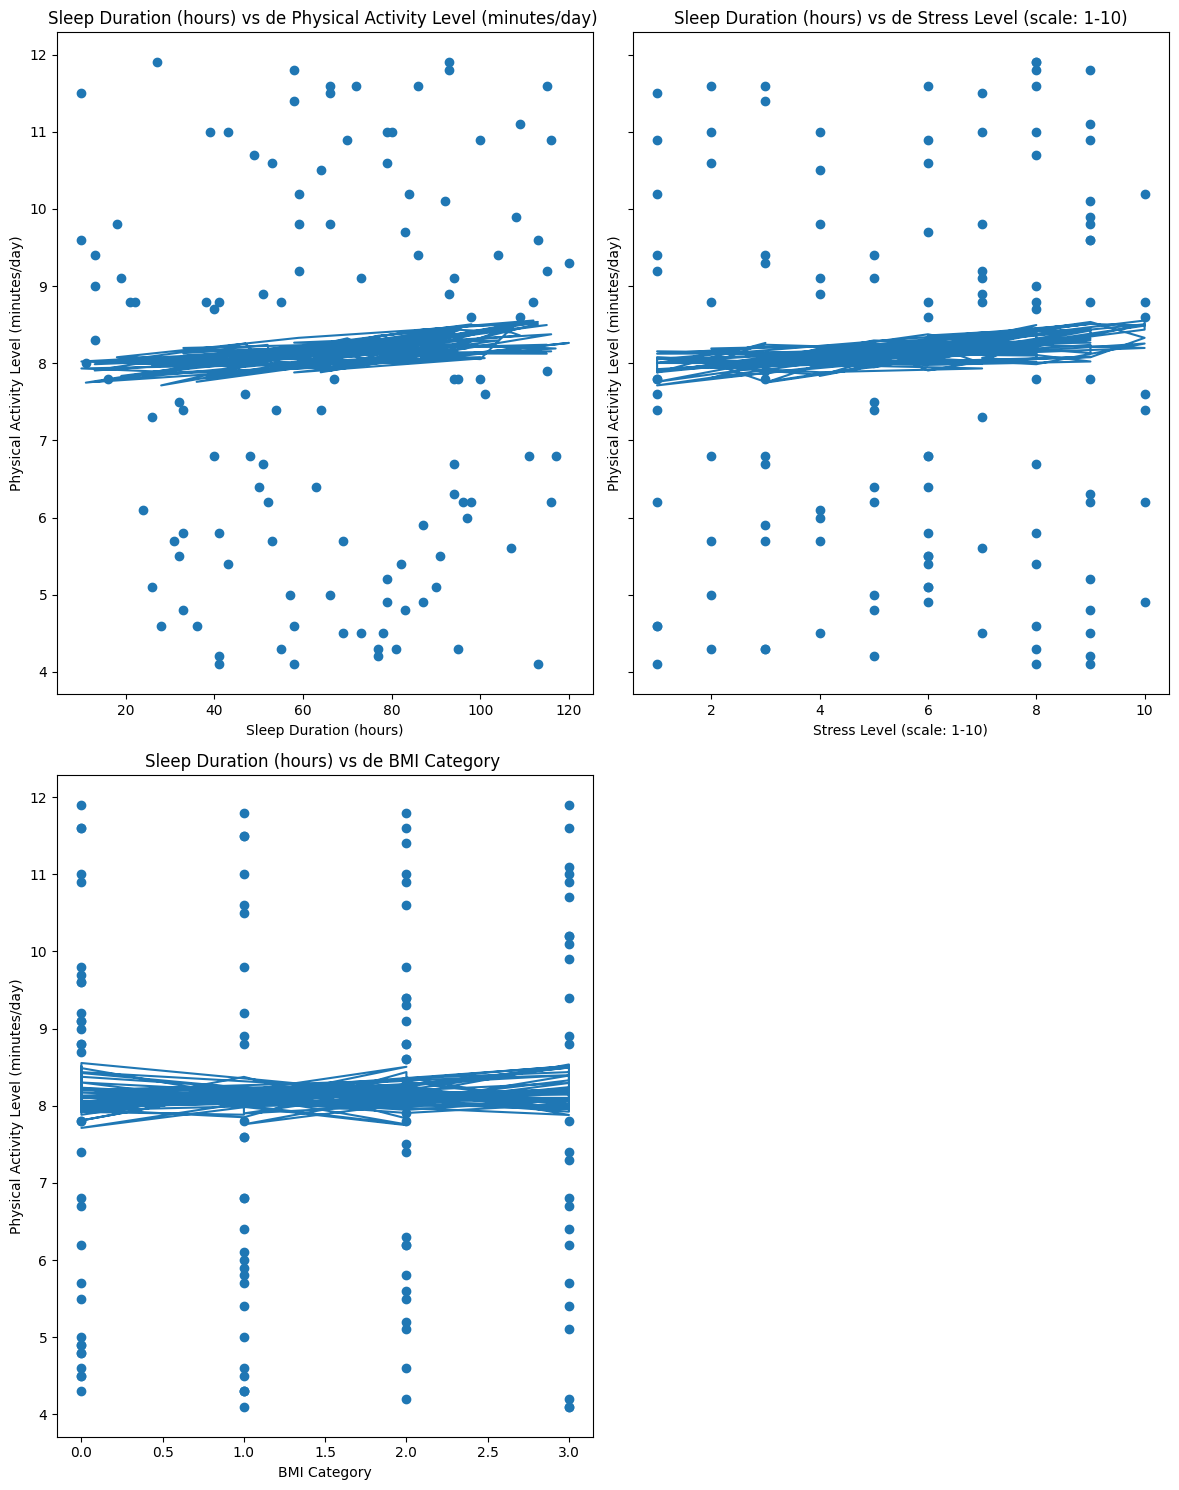

In [ ]:
import matplotlib.pyplot as plt


fig, axs = plt.subplots(2, 2, figsize = (12,15) , sharey=True)

axs[0,0].plot(X_test[:,0], y_test_predict_LinearRegression )
axs[0,0].scatter(X_test[:,0], y_test)
axs[0,0].set_title('Sleep Duration (hours) vs de Physical Activity Level (minutes/day) ')
axs[0,0].set_ylabel("Physical Activity Level (minutes/day)")
axs[0,0].set_xlabel("Sleep Duration (hours)")


axs[0,1].plot(X_test[:,1], y_test_predict_LinearRegression)
axs[0,1].scatter(X_test[:,1], y_test)
axs[0,1].set_title('Sleep Duration (hours) vs de Stress Level (scale: 1-10)')
axs[0,1].set_ylabel("Physical Activity Level (minutes/day)")
axs[0,1].set_xlabel("Stress Level (scale: 1-10)")


axs[1,0].plot(X_test[:,2], y_test_predict_LinearRegression)
axs[1,0].scatter(X_test[:,2], y_test)
axs[1,0].set_title('Sleep Duration (hours) vs de BMI Category ')
axs[1,0].set_ylabel("Physical Activity Level (minutes/day)")
axs[1,0].set_xlabel("BMI Category")


plt.tight_layout()
axs[1,1].axis('off')


plt.show()

## Section 3 : KNN - Prédire la présence de troubles du sommeil à l'aide de l'algorithme des k plus proches voisins (KNN)

In [ ]:
data.head()

,Person ID,Gender,Age,Occupation,Sleep Duration (hours),Quality of Sleep (scale: 1-10),Physical Activity Level (minutes/day),Stress Level (scale: 1-10),BMI Category,Heart Rate (bpm),Daily Steps,Sleep Disorder,systolic,diastolic
0,1,0.0,29,0,7.4,7.0,41,7,3.0,91,8539,0,124.0,70.0
1,2,1.0,43,2,4.2,4.9,41,5,3.0,81,18754,0,131.0,86.0
2,3,0.0,44,2,6.1,6.0,107,4,0.0,81,2857,0,122.0,70.0
3,4,0.0,29,1,8.3,10.0,20,10,3.0,55,6886,0,124.0,72.0
4,5,0.0,67,2,9.1,9.5,19,4,2.0,97,14945,0,133.0,78.0


In [ ]:
# 'Person ID', 'Gender', 'Age', 'Occupation', 'Sleep Duration (hours)',
#        'Quality of Sleep (scale: 1-10)',
#        'Physical Activity Level (minutes/day)', 'Stress Level (scale: 1-10)',
#        'BMI Category', 'Heart Rate (bpm)', 'Daily Steps', 'Sleep Disorder',
#        'systolic', 'diastolic'



In [ ]:
for i in data :
  print(f'valeur prise par la variable {i} : ')
  print(data[i].unique())
  print('---'*20)


valeur prise par la variable Person ID : 
[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234
 235 236 

ANALYSE BIVARIE

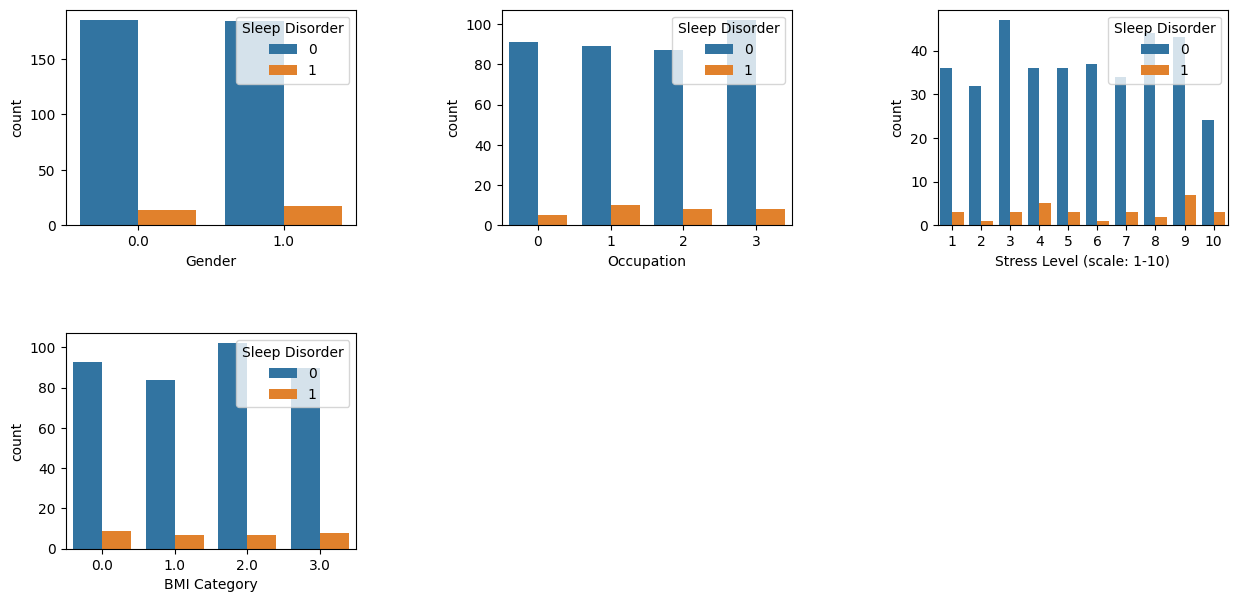

In [ ]:
variable_nominal = data[['Gender','Occupation','Stress Level (scale: 1-10)','BMI Category']]
figure, axes = plt.subplots(2, 3, figsize=(15, 7))
for index, column in enumerate(variable_nominal):
    row, col = index // 3, index % 3
    sns.countplot(x=column, data=data, hue='Sleep Disorder', ax=axes[row, col])

axes[1,1].axis('off')
axes[1,2].axis('off')
plt.subplots_adjust(hspace=0.5, wspace=0.5)
plt.show()

on remarque que pour LES 2 'Gender' on ne memarque pas une grande variation de l amplitude de 'Sleep Disorder' donc cette varialble ne permet pas reelement de classifoer le Sleep Disorder cette vriable ne sera pas prise en compte . de meme pour  'Occupation' et 'BMI Category'  on gardera *** 'Stress Level (scale: 1-10)' ***

Text(0.5, 0, 'diastolic')

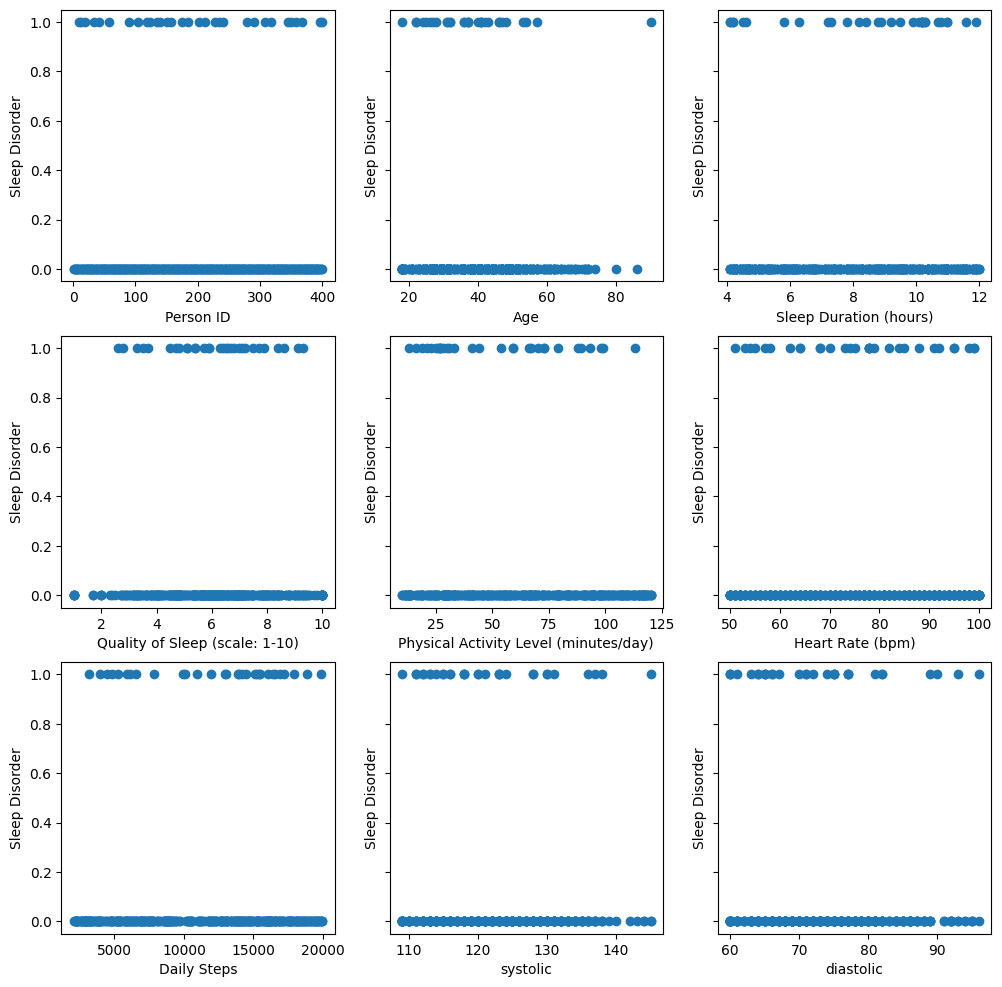

In [ ]:
import matplotlib.pyplot as plt


fig, axs = plt.subplots(3 , 3, figsize = (12,12) , sharey=True)
axs[0,0].scatter(data[['Person ID']], data[['Sleep Disorder']])
axs[0,0].set_ylabel("Sleep Disorder")
axs[0,0].set_xlabel("Person ID")


axs[0,1].scatter(data[['Age']], data[['Sleep Disorder']])
axs[0,1].set_ylabel("Sleep Disorder")
axs[0,1].set_xlabel("Age")

axs[0,2].scatter(data[['Sleep Duration (hours)']], data[['Sleep Disorder']])
axs[0,2].set_ylabel("Sleep Disorder")
axs[0,2].set_xlabel("Sleep Duration (hours)")

axs[1,0].scatter(data[['Quality of Sleep (scale: 1-10)']], data[['Sleep Disorder']])
axs[1,0].set_ylabel("Sleep Disorder")
axs[1,0].set_xlabel("Quality of Sleep (scale: 1-10)")

axs[1,1].scatter(data[['Physical Activity Level (minutes/day)']], data[['Sleep Disorder']])
axs[1,1].set_ylabel("Sleep Disorder")
axs[1,1].set_xlabel("Physical Activity Level (minutes/day)")

axs[1,2].scatter(data[['Heart Rate (bpm)']], data[['Sleep Disorder']])
axs[1,2].set_ylabel("Sleep Disorder")
axs[1,2].set_xlabel("Heart Rate (bpm)")

axs[2,0].scatter(data[['Daily Steps']], data[['Sleep Disorder']])
axs[2,0].set_ylabel("Sleep Disorder")
axs[2,0].set_xlabel("Daily Steps")

axs[2,1].scatter(data[['systolic']], data[['Sleep Disorder']])
axs[2,1].set_ylabel("Sleep Disorder")
axs[2,1].set_xlabel("systolic")

axs[2,2].scatter(data[['diastolic']], data[['Sleep Disorder']])
axs[2,2].set_ylabel("Sleep Disorder")
axs[2,2].set_xlabel("diastolic")





on vois que la prepartition de 'person ID' ne change pas beaucoup pour un 'Sleep Disorder' de 0 a l autre . meme remarque pour 'Sleep Duration (hours)' et 'Heart Rate (bpm)'  donc pour predire Sleep Disorder on va utiliser
 **'Age' , 'Quality of Sleep (scale: 1-10)','Physical Activity Level (minutes/day)','Daily Steps' , 'systolic' , 'diastolic'**

PREDICTION DE TROUBLE DE SOMMEIL

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

X1= np.array(data[[ 'Stress Level (scale: 1-10)', 'Age' , 'Quality of Sleep (scale: 1-10)','Physical Activity Level (minutes/day)','Daily Steps' , 'systolic' , 'diastolic']])
Y1=np.array(data['Sleep Disorder'])

X1_train , X1_test , y1_train , y1_test = train_test_split(X1 , Y1 ,test_size=0.8 ,random_state=0)

Scaler_x1 = StandardScaler()
X1_train_Scaled = Scaler_x1.fit_transform(X1_train)


KNN = KNeighborsClassifier(n_neighbors = 2 , p = 2 , metric = "minkowski", )
KNN.fit(X1_train_Scaled,y1_train)

y_test_predict_knn =KNN.predict(
        Scaler_x.fit_transform(X1_test)
    )


accuracy = accuracy_score(y1_test , y_test_predict_knn)

print('KNN')
print('KNN accuracy : ',accuracy)

print('--'*20)


KNN
KNN accuracy :  0.925
----------------------------------------


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

X1= np.array(data[[ 'Stress Level (scale: 1-10)', 'Age' , 'Quality of Sleep (scale: 1-10)','Physical Activity Level (minutes/day)','Daily Steps' , 'systolic' , 'diastolic']])
Y1=np.array(data['Sleep Disorder'])

X1_train , X1_test , y1_train , y1_test = train_test_split(X1 , Y1 ,test_size=0.3,random_state=0)

Scaler_x1 = StandardScaler()
X1_train_Scaled = Scaler_x1.fit_transform(X1_train)


KNN = KNeighborsClassifier(n_neighbors = 5 , p = 2 , metric = "minkowski" )
KNN.fit(X1_train_Scaled,y1_train)

y_test_predict_knn =KNN.predict(
        Scaler_x.fit_transform(X1_test)
    )


accuracy = accuracy_score(y1_test , y_test_predict_knn)

print('KNN')
print('KNN accuracy : ',accuracy)

print('--'*20)


KNN
KNN accuracy :  0.9083333333333333
----------------------------------------


validation croisée pour identifier la valeur optimale de k

In [ ]:
from sklearn.model_selection import ParameterGrid
import numpy as np

grid = np.arange(1,20)
vect = []

best_accuracy = 0.
best = None
for i in grid:
  KNN = KNeighborsClassifier(n_neighbors = i , p = 2 , metric = "minkowski", )
  KNN.fit(X1_train_Scaled,y1_train)

  y_test_predict_knn =KNN.predict(
        Scaler_x.fit_transform(X1_test)
    )

  accuracy = accuracy_score(y1_test , y_test_predict_knn)
  vect.append(accuracy)

  if accuracy > best_accuracy:
    print(f"NEW BEST k : {i} avec precision de : {accuracy} ")
    print("-"*60)
    best_accuracy = accuracy
    best = i


print(f"[*] Best accuracy {accuracy}")
print(f"[*] Best set of parameters {best}")

NEW BEST k : 1 avec precision de : 0.8666666666666667 
------------------------------------------------------------
NEW BEST k : 2 avec precision de : 0.9333333333333333 
------------------------------------------------------------
NEW BEST k : 8 avec precision de : 0.9416666666666667 
------------------------------------------------------------
[*] Best accuracy 0.9416666666666667
[*] Best set of parameters 8


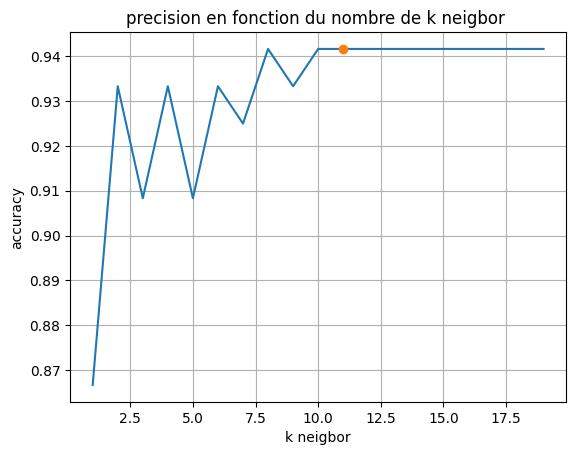

In [ ]:
plt.plot(grid , vect)
plt.plot(11, 0.94166 , 'o')
plt.title('precision en fonction du nombre de k neigbor ')
plt.xlabel('k neigbor')
plt.ylabel('accuracy')
plt.grid()
plt.show()

don on deduit que le k optimal est 11

In [ ]:
from sklearn.metrics import accuracy_score , recall_score, f1_score
# les metrics pour k = 11 :
KNN = KNeighborsClassifier(n_neighbors = 11 , p = 2 , metric = "minkowski", )
KNN.fit(X1_train_Scaled,y1_train)
y_test_predict_knn =KNN.predict(
        Scaler_x.fit_transform(X1_test)
    )

print('KNN accuracy : ',accuracy)
print('--'*20)
recall = recall_score(y1_test , y_test_predict_knn)
print('KNN recall : ',recall)
print('--'*20)
F1=f1_score(y1_test , y_test_predict_knn)

print('KNN F1 : ',F1)
print('--'*20)



KNN accuracy :  0.9416666666666667
----------------------------------------
KNN recall :  0.0
----------------------------------------
KNN F1 :  0.0
----------------------------------------


<Axes: >

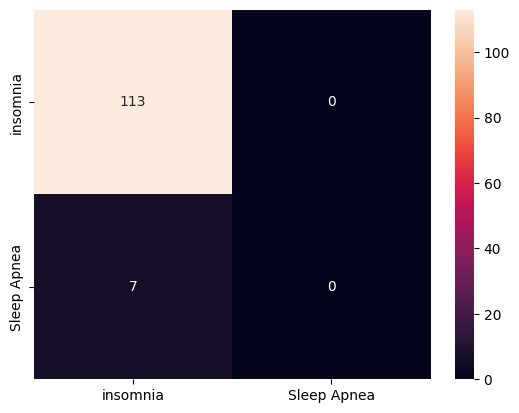

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
import seaborn as sns

cm = confusion_matrix(y1_test , y_test_predict_knn)
sns.heatmap(cm , annot=True, fmt='g', xticklabels=['insomnia','Sleep Apnea'],yticklabels=['insomnia','Sleep Apnea'])



In [ ]:
print(classification_report(y1_test , y_test_predict_knn))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97       113
           1       0.00      0.00      0.00         7

    accuracy                           0.94       120
   macro avg       0.47      0.50      0.48       120
weighted avg       0.89      0.94      0.91       120



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))




• Discuter des différences d'approche et de performance entre KNN et la régression linéaire, en
mettant en avant leurs forces et faiblesses respectives.


* la regression lineaire sur ce data pour predire la durée du sommeil n a pas donner de bon resultat on en abtenus qui predit moins bien que la moyenne au vu du manque de correlation entre les donné du data . ce qui a donc revelée la sensibilité de la regression lineaire par rapport a la correlation avec les feautures .

* parcontre la classification de trouble de sommeil avec ce data a donnée d excelent resultat avec de tres bonne metrics . donc la proportion de ce qui est du a la presence d influence de certaines variable sur cette variable cible . cette influence est visible dans l analyse bivarié ainsi que les nuage de point observé precedemment

##Section 4 : KMeans

- Identifier des clusters d'individus en fonction de leurs caractéristiques liées au    sommeil et au mode de vie.

• Normaliser le jeu de données pour s'assurer que toutes les variables sont sur la même échelle.

• Déterminer le nombre optimal de clusters en traçant la somme des carrés intra-cluster (WCSS) pour différentes valeurs de k (par exemple, k=1 à k=10).

• Réaliser une analyse de silhouette pour valider le choix de k.

• Appliquer l'algorithme KMeans avec la valeur optimale de k identifiée.
• Attribuer des étiquettes de cluster à chaque individu du jeu de données.
• Visualiser les clusters en utilisant l'analyse en composantes principales (PCA) pour réduire les
dimensions du jeu de données à deux dimensions et tracer les clusters.
• Marquer les centroids des clusters et analyser leur séparabilité.

In [ ]:
data.head()

,Person ID,Gender,Age,Occupation,Sleep Duration (hours),Quality of Sleep (scale: 1-10),Physical Activity Level (minutes/day),Stress Level (scale: 1-10),BMI Category,Heart Rate (bpm),Daily Steps,Sleep Disorder,systolic,diastolic
0,1,0.0,29,0,7.4,7.0,41,7,3.0,91,8539,0,124.0,70.0
1,2,1.0,43,2,4.2,4.9,41,5,3.0,81,18754,0,131.0,86.0
2,3,0.0,44,2,6.1,6.0,107,4,0.0,81,2857,0,122.0,70.0
3,4,0.0,29,1,8.3,10.0,20,10,3.0,55,6886,0,124.0,72.0
4,5,0.0,67,2,9.1,9.5,19,4,2.0,97,14945,0,133.0,78.0


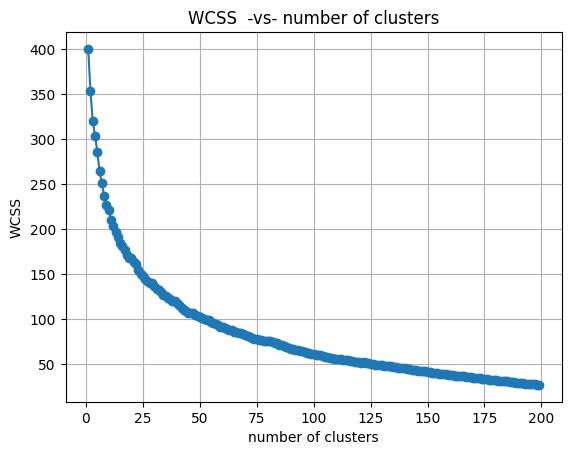

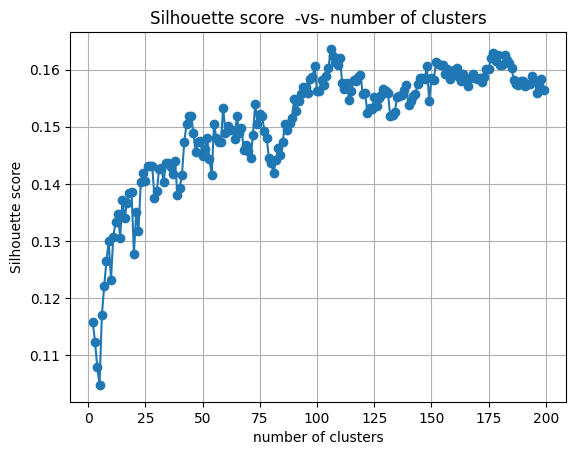

ke k optimal est :  106 avec un silouette score =  0.1563624486729669


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler , normalize
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


X0 = data[['Sleep Duration (hours)','Quality of Sleep (scale: 1-10)', 'Stress Level (scale: 1-10)', 'Daily Steps','Physical Activity Level (minutes/day)', 'BMI Category', 'Occupation']]

Scaler_x0 = StandardScaler()
X0_Scaled = Scaler_x0.fit_transform(X0)
#on normalize aussi car k mean est sensible au distance

X0_normalized = normalize(X0_Scaled)
WCSS = []
Silhouette_score = []

k_select  = range(1,200)
k_optimal = None
for k in k_select :
  kmeans = KMeans(n_clusters = k ,init ="k-means++",random_state = 0 , max_iter=300)
  kmeans.fit(X0_normalized)
  clusters = kmeans.predict(X0_normalized)
  WCSS.append(kmeans.inertia_)
  if k > 1 :
    score = silhouette_score(X0_normalized , clusters)
    Silhouette_score.append(score)
    if k>2 and score >= max(Silhouette_score) :
      k_optimal = k

plt.plot(k_select , WCSS ,'-o' )
plt.grid()
plt.xlabel('number of clusters')
plt.ylabel('WCSS')
plt.title('WCSS  -vs- number of clusters')
plt.show()

plt.plot(k_select[1:] , Silhouette_score ,'-o' )
plt.grid()
plt.xlabel('number of clusters')
plt.ylabel('Silhouette score')
plt.title('Silhouette score  -vs- number of clusters')
plt.show()
print('ke k optimal est : ',k_optimal,'avec un silouette score = ',score)

* on obtient k optimal = 7 d apres la methode elbow
* on obtient k optimal = 128 d apres la methode du score silhouette


In [ ]:
kmeans = KMeans(n_clusters = k_optimal ,init ="k-means++",random_state = 0 , max_iter=300)
kmeans.fit(X0_normalized)
clusters = kmeans.predict(X0_normalized)
score = silhouette_score(X0_normalized , clusters)

clusters_df = pd.DataFrame(X0_normalized)
clusters_df['cluster_k_means'] = clusters
centroides =  kmeans.cluster_centers_


In [ ]:
clusters_df

,0,1,2,3,4,5,6,cluster_k_means
0,-0.120120,0.198169,0.243556,-0.211828,-0.332578,0.597109,-0.612341,90
1,-0.585445,-0.226062,-0.061298,0.521460,-0.270595,0.485825,0.145683,17
2,-0.307970,-0.024141,-0.198845,-0.581114,0.493400,-0.510784,0.151643,65
3,0.032607,0.590782,0.485642,-0.235333,-0.419625,0.401692,-0.145743,58
4,0.176599,0.681059,-0.209065,0.287557,-0.567777,0.175450,0.159437,35
...,...,...,...,...,...,...,...,...
395,-0.624985,0.378914,0.229470,0.269023,0.104709,-0.191294,0.541508,45
396,-0.369395,-0.005639,0.389329,0.142864,0.093970,0.576847,-0.591562,73
397,-0.404698,0.066859,0.568947,0.274910,-0.076334,0.470597,0.452975,76
398,0.435354,0.529571,0.441806,-0.295700,0.087298,0.469030,0.140646,55


application du pca pour permettre la visualisation

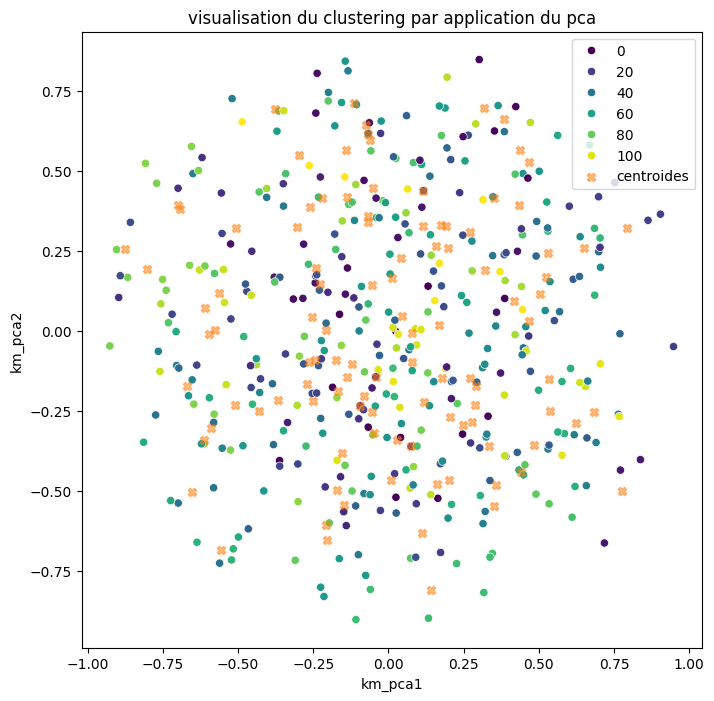

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X0_normalized_pca = pca.fit_transform(X0_normalized)

clusters_df['km_pca1'] = X0_normalized_pca[:,0]
clusters_df['km_pca2'] = X0_normalized_pca[:,1]

centroides_pca = pca.transform(centroides)
plt.figure(figsize=(8,8))
sns.scatterplot(x= 'km_pca1' , y = 'km_pca2' ,hue =clusters_df['cluster_k_means'] , data=clusters_df ,  palette='viridis' )
plt.scatter(centroides_pca[:,0] , centroides_pca[:,1],label = 'centroides' , alpha = 0.5 ,marker='X')
plt.title('visualisation du clustering par application du pca')
plt.legend()
plt.show()

In [ ]:
len(clusters_df['cluster_k_means'].unique())

106

alanyse ❌

## Section 5 : DBSCAN

Section 5 : DBSCAN - Détecter des schémas inhabituels ou des outliers dans le jeu de données à l'aide de l'algorithme DBSCAN.

• Utiliser un graphique des distances k pour déterminer la valeur appropriée de seuil de distance.

• Expérimenter différentes valeurs de seuil de distance et MinPts (nombre minimum de points par cluster) pour affiner le modèle.

• Appliquer l'algorithme DBSCAN au jeu de données et attribuer des étiquettes de cluster. Identifie
r les points classifiés comme bruit.

• Réduire les dimensions avec le PCA et tracer les clusters et les points de bruit.

• Comparer les clusters produits par DBSCAN avec ceux de KMeans.

In [ ]:
!pip install hdbscan

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler , normalize
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score , davies_bouldin_score
from sklearn.decomposition import PCA
from hdbscan.validity import validity_index

X01= data.to_numpy()


Scaler_x1 = StandardScaler()
X1_Scaled = Scaler_x1.fit_transform(X01)
#comme on utilise un algorithme basé sur la distance on va normaliser le data
X1_normalized = normalize(X1_Scaled)
#on applique un PCA pour avour une 2D



eps= [10e-2, 0.1, 0.2, 0.3, 0.4 ,0.5,0.6]
min_samples =  [2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20],


SCORE =[]

for e in eps :
  for m in range(2,20) :
    dbscan = DBSCAN(eps = e,min_samples= m , metric = 'euclidean')
    dbscan.fit(X1_normalized)
    score = validity_index(X1_normalized, dbscan.labels_)
    SCORE.append(score)
    if m == 2 :
      best_eps = e
      best_min_samples = m
      best_score = score
    elif m >2 and score > max(SCORE) :
      best_eps = e
      best_min_samples = m
      best_score = score


best_dbscan = DBSCAN(eps = best_eps , min_samples = best_min_samples , metric = 'euclidean')
best_dbscan.fit(X1_normalized)
labels = best_dbscan.labels_

df = data.copy()
df['clusters_dbscan'] = labels
print(f"le score silouette obtenu pour le dbscan  :  {best_score} avec eps = {best_eps} m_samples = {best_min_samples}")
# si label = -1 le point est un cluster .




le score silouette obtenu pour le dbscan  :  0.08840544643800305 avec eps = 0.6 m_samples = 2


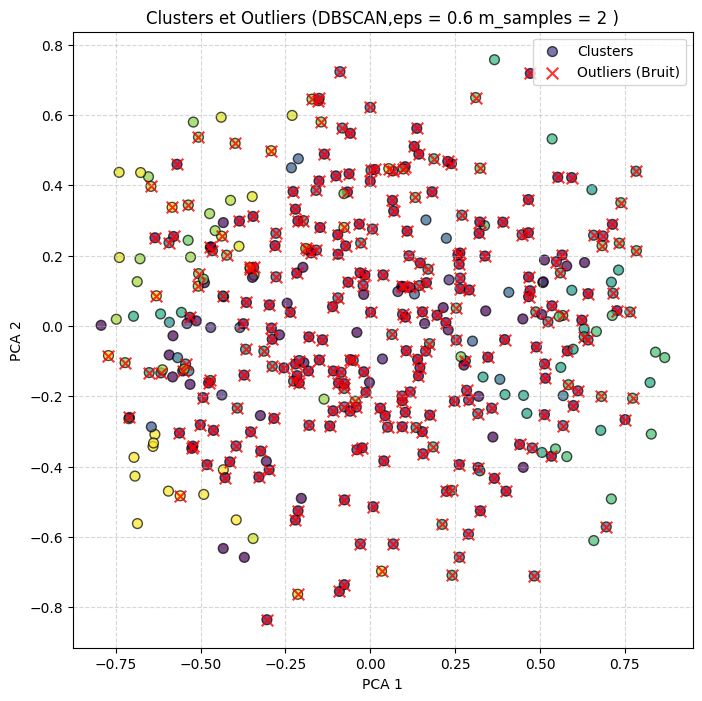

In [ ]:
#application du PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X0_normalized_pca = pca.fit_transform(X1_normalized)

df['db_pca1'] = X0_normalized_pca[:,0]
df['db_pca2'] = X0_normalized_pca[:,1]

plt.figure(figsize=(8,8))

#plt by chat gpt
scatter = plt.scatter(
    X0_normalized_pca[:, 0],
    X0_normalized_pca[:, 1],
    c=best_labels,
    cmap='viridis',
    s=50,
    alpha=0.7,
    edgecolors='k',
    label='Clusters'
)

outliers = X0_normalized_pca[labels == -1]
plt.scatter(
    outliers[:, 0],
    outliers[:, 1],
    c='red',
    s=70,
    alpha=0.8,
    label='Outliers (Bruit)',
    marker='x'
)

plt.title('Clusters et Outliers (DBSCAN,eps = 0.6 m_samples = 2 )')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

#end plot



# plt.scatter(df[['db_pca1']], df[['db_pca2']],  color='k' )

# for i in range(len(df)):
#   if df['Outliers' ][i]==-1 :
#     X=np.array([[df['db_pca1']] , [df['db_pca2'] ]])

# plt.scatter(X[: ,0] ,X[:,1],  color="r")

# plt.title('visualisation du clustering par application du pca')
# plt.legend()
# plt.show()


In [ ]:
len(df['clusters_dbscan'].unique())

49

In [ ]:
#essayon avec hDBSCAN
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler , normalize
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score , davies_bouldin_score
from sklearn.decomposition import PCA
import hdbscan
from hdbscan.validity import validity_index

X01= data.to_numpy()


Scaler_x1 = StandardScaler()
X1_Scaled = Scaler_x1.fit_transform(X01)
#comme on utilise un algorithme basé sur la distance on va normaliser le data
X1_normalized = normalize(X1_Scaled)
#on applique un PCA pour avour une 2D

SCORE =[]

for m in range(2,20) :
    hhdbscan = hdbscan.HDBSCAN(min_cluster_size=m)
    labels = hhdbscan.fit_predict(X1_normalized)
    score = validity_index(X1_normalized, labels)
    SCORE.append(score)
    if m == 2 :
      best_min_samples = m
      best_score = score
      best_labels = labels
    elif m >2 and score > max(SCORE) :
      best_min_samples = m
      best_score = score
      best_labels = labels




best_hhdbscan = hdbscan.HDBSCAN(min_cluster_size=best_min_samples)
best_hhdbscan.fit(X1_normalized)
hlabels = best_hhdbscan.labels_

df['clusters_hdbscan'] = hlabels
print(f"le score silouette obtenu pour le dbscan  :  {best_score} avec  m_samples = {best_min_samples}")
# si label = -1 le point est un cluster .





/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

le score silouette obtenu pour le dbscan  :  0.07068260718731567 avec  m_samples = 2


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

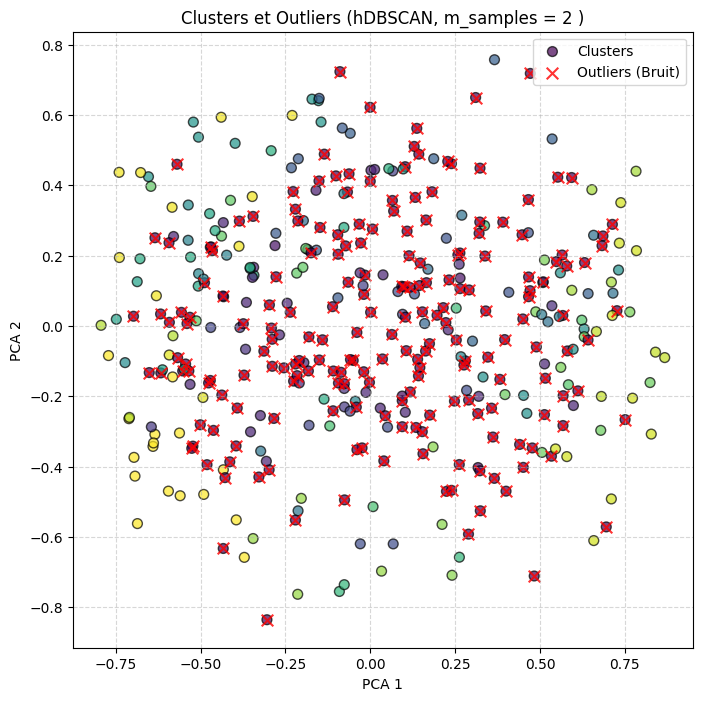

In [ ]:
#application du PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X0_normalized_pca = pca.fit_transform(X1_normalized)

df['hdb_pca1'] = X0_normalized_pca[:,0]
df['hdb_pca2'] = X0_normalized_pca[:,1]

plt.figure(figsize=(8,8))

#plt by chat gpt
scatter = plt.scatter(
    X0_normalized_pca[:, 0],
    X0_normalized_pca[:, 1],
    c=best_labels,
    cmap='viridis',
    s=50,
    alpha=0.7,
    edgecolors='k',
    label='Clusters'
)

outliers = X0_normalized_pca[hlabels == -1]
plt.scatter(
    outliers[:, 0],
    outliers[:, 1],
    c='red',
    s=70,
    alpha=0.8,
    label='Outliers (Bruit)',
    marker='x'
)

plt.title('Clusters et Outliers (hDBSCAN, m_samples = 2 )')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

#end plot



# plt.scatter(df[['db_pca1']], df[['db_pca2']],  color='k' )

# for i in range(len(df)):
#   if df['Outliers' ][i]==-1 :
#     X=np.array([[df['db_pca1']] , [df['db_pca2'] ]])

# plt.scatter(X[: ,0] ,X[:,1],  color="r")

# plt.title('visualisation du clustering par application du pca')
# plt.legend()
# plt.show()


In [ ]:
len(df['clusters_hdbscan'].unique())

45

* on remarque que la metric de l implementation de DBscan est meilleur que celle de HDBSCAN sur ce data donc on utilisera cette derniere pour le choix eliminer les outliers de notre data initial

In [ ]:
data_sans_outlier = data[ labels!=-1]

In [ ]:
data_sans_outlier.head()

,Person ID,Gender,Age,Occupation,Sleep Duration (hours),Quality of Sleep (scale: 1-10),Physical Activity Level (minutes/day),Stress Level (scale: 1-10),BMI Category,Heart Rate (bpm),Daily Steps,Sleep Disorder,systolic,diastolic
15,16,0.0,68,3,8.6,9.1,98,10,2.0,96,14180,0,134.0,79.0
27,28,1.0,80,2,9.3,2.8,103,7,2.0,91,18544,0,140.0,86.0
32,33,1.0,36,3,8.2,7.0,27,3,1.0,88,17228,1,118.0,67.0
50,51,0.0,56,3,4.2,5.9,101,6,3.0,65,7669,0,138.0,88.0
51,52,1.0,55,3,6.1,7.0,38,2,3.0,67,4735,0,137.0,84.0


In [ ]:
data_sans_outlier.info()

<class 'pandas.core.frame.DataFrame'>
Index: 75 entries, 15 to 394
Data columns (total 14 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Person ID                              75 non-null     int64  
 1   Gender                                 75 non-null     float64
 2   Age                                    75 non-null     int64  
 3   Occupation                             75 non-null     int64  
 4   Sleep Duration (hours)                 75 non-null     float64
 5   Quality of Sleep (scale: 1-10)         75 non-null     float64
 6   Physical Activity Level (minutes/day)  75 non-null     int64  
 7   Stress Level (scale: 1-10)             75 non-null     int64  
 8   BMI Category                           75 non-null     float64
 9   Heart Rate (bpm)                       75 non-null     int64  
 10  Daily Steps                            75 non-null     int64  
 11  Sleep Disor

In [ ]:
data_sans_outlier.to_csv('data_sans_outlier.csv')

l implementation le fais que dbscan ne sois passemsible au outlier est un avantage que nous permettra a l avenir d implementer l algorithme du DBscan lors du preprocessin pour la detection des outlier .



In [ ]:
Bonjour ainée ,
j'espere que vous allez bien
je m appel DJERI de nationnalité togolaise je suis acces en 3 em année a l ensam meknes en IA et data technologie - systeme indstriel  avant j ai fais un DEUST de 2 ans a lz fst de beni mellal
un de mes collegue de classe un tchadien m a parler de vous
j aimerais vous demander si vous avez quelque ressources pour moi de vos années passer  a l ensam dans la filiere des ancien exam , des notbook des ressource ou autres
car certains on des resources et tout mais ils disent que ils ne peuvent pas me les donner



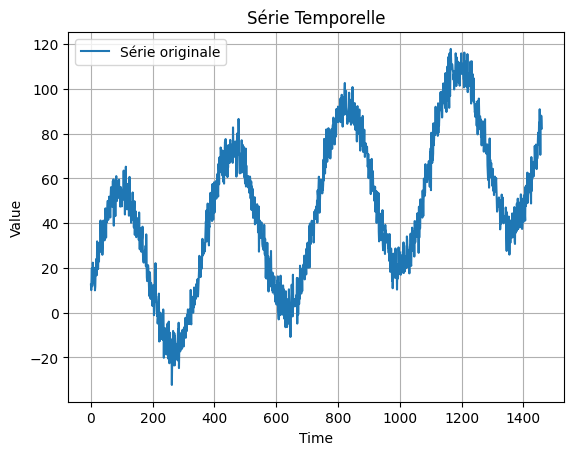

X shape : (1456, 5)
Y shape : (1456,)
X_train shape : (1164, 5)
X_test shape : (292, 5)
📊 Linear Regression Metrics:
MAE  : 0.1367
RMSE : 0.0284
R²   : 0.9549


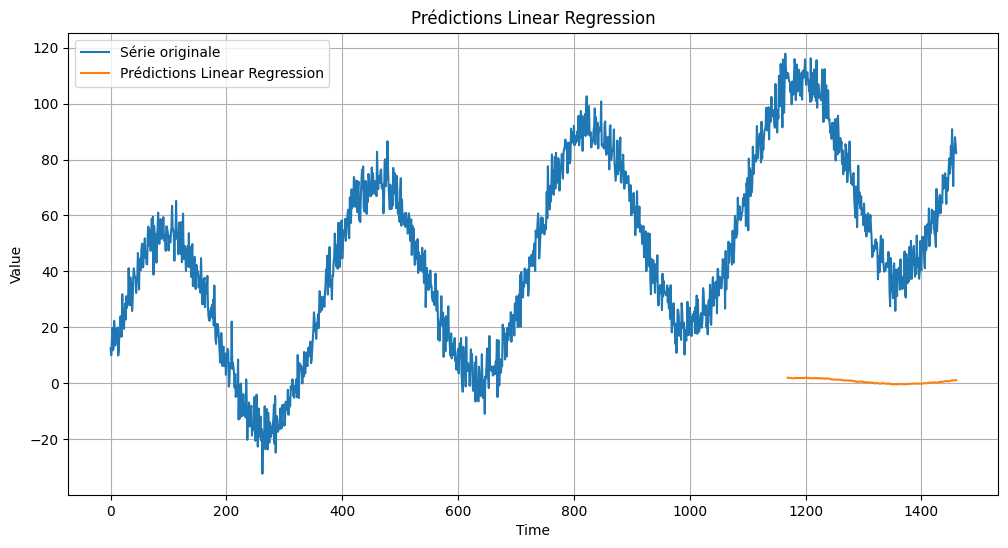

In [ ]:
# 📂 Correction complète du fichier `time_series_lab.py`

# 📚 Importations
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

np.random.seed(42)  # 🔀 Fixe la graine aléatoire

# ==============================================================================
# 🟡 1️⃣ Génération de la Série Temporelle
# ==============================================================================
time = np.arange(4*365+1)  # 4 ans + 1 jour
baseline = 10
amplitude = 40
slope = 0.05
noise_level = 5

Serie = baseline + slope * time
Serie += amplitude * np.sin((time / 365) * 2 * np.pi)
Serie += np.random.normal(scale=noise_level, size=len(time))

# ==============================================================================
# 📊 2️⃣ Fonction de Traçage : plot_series()
# ==============================================================================
def plot_series(time, series, format="-", label=None, title=None):
    """
    Affiche une série temporelle.
    time : axe X (temps)
    series : axe Y (valeurs)
    """
    plt.plot(time, series, format, label=label)
    plt.xlabel("Time")
    plt.ylabel("Value")
    plt.grid(True)
    if label:
        plt.legend()
    if title:
        plt.title(title)

# 🔹 Tracé de la série originale
plot_series(time, Serie, label='Série originale', title='Série Temporelle')
plt.show()

# ==============================================================================
# 🟢 3️⃣ Prétraitement des Données (StandardScaler)
# ==============================================================================
Scaler_Serie = StandardScaler()
Serie = Serie.reshape(-1, 1)  # reshape en colonne
Serie_scaled = Scaler_Serie.fit_transform(Serie)

# ==============================================================================
# 🟠 4️⃣ Fonction de Fenêtrage : window()
# ==============================================================================
def window(serie, w, step=1):
    """
    Fonction de fenêtrage pour séries temporelles.
    - X : Séquences (fenêtres)
    - y : Valeur suivante
    """
    X, y = [], []
    for i in range(0, len(serie) - w, step):
        X.append(serie[i:i + w].flatten())  # aplati chaque fenêtre
        y.append(serie[i + w])              # valeur suivante
    return np.array(X), np.array(y).flatten()

# 📊 Fenêtrage
window_size = 5
X_windowed, Y_windowed = window(Serie_scaled, w=window_size, step=1)

print(f"X shape : {X_windowed.shape}")
print(f"Y shape : {Y_windowed.shape}")

# ==============================================================================
# 🟡 5️⃣ Split Temporel (80% Train, 20% Test) - Série Temporelle
# ==============================================================================
train_size = int(0.8 * len(X_windowed))

X_train, X_test = X_windowed[:train_size], X_windowed[train_size:]
y_train, y_test = Y_windowed[:train_size], Y_windowed[train_size:]

print(f"X_train shape : {X_train.shape}")
print(f"X_test shape : {X_test.shape}")

# ==============================================================================
# 📈 6️⃣ Régression Linéaire
# ==============================================================================
model_LR = LinearRegression()
model_LR.fit(X_train, y_train)

# 🔮 Prédictions
y_LR = model_LR.predict(X_test)

# ==============================================================================
# 📊 7️⃣ Évaluation du Modèle (MAE, RMSE, R²)
# ==============================================================================
mae = mean_absolute_error(y_test, y_LR)
rmse = mean_squared_error(y_test, y_LR)
r2 = r2_score(y_test, y_LR)

print(f"📊 Linear Regression Metrics:")
print(f"MAE  : {mae:.4f}")
print(f"RMSE : {rmse:.4f}")
print(f"R²   : {r2:.4f}")

# ==============================================================================
# 🟠 8️⃣ Tracé des Prédictions vs Série Originale
# ==============================================================================
time_test = time[-len(y_LR):]  # Alignement temporel

plt.figure(figsize=(12, 6))
plot_series(time, Serie.flatten(), label='Série originale', title='Prédictions Linear Regression')
plot_series(time_test, y_LR, label='Prédictions Linear Regression')
plt.show()

# ==============================================================================
# 🚀 ✅ FIN DE L’ANALYSE
# ==============================================================================
